#TP2 Exercice 3 : 
Analyse reproductible en Python
Date de création : 16 / 03 / 2018
Partie 1 : Chargement et nettoyage
— Téléchargez les données au format CSV
— Chargez les dans une dataframe
— Vérifiez que epaisseurdernierstravaux est bien de type réel.
— Identifiez et nettoyez les valeurs aberrantes. Justifiez votre stratégie
de nettoyage.
4. Partie 2 : Analyse
— Quels sont les 5 natures de travaux les plus fréquentes ?
— Pour chaque année, quel est le nombre de travaux réalisés et l’épaisseur
moyennne ? Triez le résultat par épaisseur descendante.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
df = pd.read_csv('C:/Users/user/Desktop/RepositoryTP/PythonBDTN-TU/TP2/CGDRSGDRDTRoutesdernierstravaux.csv',sep=";")

Check for na values

In [12]:
pd.isnull(df['epaisseurdernierstravaux']).sum()

0

Part 1 : 
1.Check if epaisseurdersnierstravaux is numeric format.
 Let's check if that epaisseurdernierstravaux is a numeric value.


In [13]:
df.dtypes

entityid                    object
route                       object
rub                          int64
age                          int64
mois                         int64
annee                        int64
prd                          int64
abd                          int64
prf                          int64
abf                          int64
cumuld                       int64
cumulf                       int64
long                         int64
epaisseurdernierstravaux    object
anneedernierstravaux         int64
naturedernierstravaux       object
supportdernierstravaux      object
dtype: object

It's an object value, let's convert that column into numeric values.

In [14]:
pd.to_numeric(df['epaisseurdernierstravaux'],errors='ignore')

0           1,5
1             1
2             1
3             2
4             1
5             6
6             4
7             1
8             5
9             3
10            1
11            4
12            5
13            3
14            6
15            2
16            2
17            8
18          1,2
19            0
20            4
21            6
22            1
23            1
24            5
25            1
26            3
27      9999,99
28            5
29            4
         ...   
5462        0,6
5463        1,5
5464          4
5465          1
5466        0,6
5467          1
5468          1
5469          1
5470        1,5
5471          1
5472        1,2
5473        2,5
5474          1
5475          4
5476          1
5477        2,5
5478          4
5479          4
5480        1,5
5481          1
5482        3,5
5483          4
5484          1
5485          1
5486          4
5487          3
5488          1
5489        2,5
5490          4
5491          1
Name: epaisseurdernierst

In [15]:
df.dtypes
df.epaisseurdernierstravaux

entityid                    object
route                       object
rub                          int64
age                          int64
mois                         int64
annee                        int64
prd                          int64
abd                          int64
prf                          int64
abf                          int64
cumuld                       int64
cumulf                       int64
long                         int64
epaisseurdernierstravaux    object
anneedernierstravaux         int64
naturedernierstravaux       object
supportdernierstravaux      object
dtype: object

0           1,5
1             1
2             1
3             2
4             1
5             6
6             4
7             1
8             5
9             3
10            1
11            4
12            5
13            3
14            6
15            2
16            2
17            8
18          1,2
19            0
20            4
21            6
22            1
23            1
24            5
25            1
26            3
27      9999,99
28            5
29            4
         ...   
5462        0,6
5463        1,5
5464          4
5465          1
5466        0,6
5467          1
5468          1
5469          1
5470        1,5
5471          1
5472        1,2
5473        2,5
5474          1
5475          4
5476          1
5477        2,5
5478          4
5479          4
5480        1,5
5481          1
5482        3,5
5483          4
5484          1
5485          1
5486          4
5487          3
5488          1
5489        2,5
5490          4
5491          1
Name: epaisseurdernierst

#Commas will be a problem, python can't convert values with commas. Let's replace them with a dot.

In [16]:
df.epaisseurdernierstravaux = df.epaisseurdernierstravaux.apply(lambda x : x.replace(',','.'))
df.epaisseurdernierstravaux = df.epaisseurdernierstravaux.astype(float)
df.dtypes

entityid                     object
route                        object
rub                           int64
age                           int64
mois                          int64
annee                         int64
prd                           int64
abd                           int64
prf                           int64
abf                           int64
cumuld                        int64
cumulf                        int64
long                          int64
epaisseurdernierstravaux    float64
anneedernierstravaux          int64
naturedernierstravaux        object
supportdernierstravaux       object
dtype: object

2.Identify and clean aberrants values, please justify.

count    5492.000000
mean      106.477810
std      1013.277896
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      9999.990000
Name: epaisseurdernierstravaux, dtype: float64

0.0

9999.9899999999998

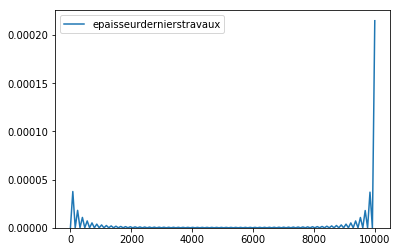

In [17]:
%matplotlib inline
df.epaisseurdernierstravaux.describe()
plot = sns.kdeplot(df['epaisseurdernierstravaux'])
min(df.epaisseurdernierstravaux)
max(df.epaisseurdernierstravaux)

9999.99 as max is too high, 0 is useless.

In [18]:
df[df.epaisseurdernierstravaux==min(df.epaisseurdernierstravaux)].count()
df[df.epaisseurdernierstravaux==max(df.epaisseurdernierstravaux)].count()

entityid                    189
route                       189
rub                         189
age                         189
mois                        189
annee                       189
prd                         189
abd                         189
prf                         189
abf                         189
cumuld                      189
cumulf                      189
long                        189
epaisseurdernierstravaux    189
anneedernierstravaux        189
naturedernierstravaux       189
supportdernierstravaux      189
dtype: int64

entityid                    57
route                       57
rub                         57
age                         57
mois                        57
annee                       57
prd                         57
abd                         57
prf                         57
abf                         57
cumuld                      57
cumulf                      57
long                        57
epaisseurdernierstravaux    57
anneedernierstravaux        57
naturedernierstravaux       57
supportdernierstravaux      57
dtype: int64

Thats 246 wrong values. let's delete those as they are absurd values.

0.0

9999.9899999999998

0.10000000000000001

30.0

,rub,age,mois,annee,prd,abd,prf,abf,cumuld,cumulf,long,epaisseurdernierstravaux,anneedernierstravaux
count,5246.0,5246.0,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000
mean,20.0,0.0,7.455395,8.440907,18.012772,472.423561,19.158216,523.053755,17936.242280,19129.482463,1193.240183,2.816756,2003.712543
std,0.0,0.0,2.266306,2.293073,21.103911,411.296430,21.172993,407.365187,20626.384755,20673.549695,1328.342777,2.019426,6.627276
min,20.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.100000,1900.000000
25%,20.0,0.0,7.000000,7.000000,3.000000,160.000000,5.000000,235.000000,3456.000000,4654.500000,260.000000,1.000000,2000.000000
50%,20.0,0.0,7.000000,7.000000,11.000000,445.000000,12.000000,500.000000,11051.500000,12323.500000,724.000000,2.000000,2004.000000
75%,20.0,0.0,9.000000,9.000000,25.000000,731.000000,26.000000,760.000000,24579.500000,25973.750000,1673.750000,4.000000,2007.000000
max,20.0,0.0,12.000000,50.000000,132.000000,8000.000000,134.000000,8000.000000,131215.000000,133893.000000,10992.000000,30.000000,2014.000000


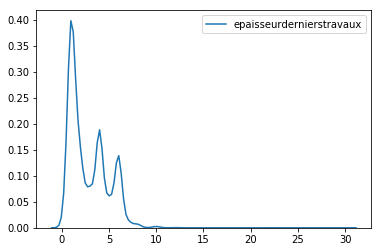

In [19]:
min(df.epaisseurdernierstravaux)
max(df.epaisseurdernierstravaux)
maxEpaisseur = df.epaisseurdernierstravaux.max()
minEpaisseur = df.epaisseurdernierstravaux.min()
#Dropping max and min values in the dataframe
df = df.loc[df['epaisseurdernierstravaux']!= maxEpaisseur]
df = df.loc[df['epaisseurdernierstravaux']!= minEpaisseur]


sns.kdeplot(df['epaisseurdernierstravaux'])
min(df.epaisseurdernierstravaux)
max(df.epaisseurdernierstravaux)
df.describe()

That's better now. Now let's clean other columns, age has 0 values, we can drop this column.

In [20]:
df = df.drop(['age'],axis=1)

Part 2 : what are the 5 most kind of construction.

In [21]:
df.dtypes

entityid                     object
route                        object
rub                           int64
mois                          int64
annee                         int64
prd                           int64
abd                           int64
prf                           int64
abf                           int64
cumuld                        int64
cumulf                        int64
long                          int64
epaisseurdernierstravaux    float64
anneedernierstravaux          int64
naturedernierstravaux        object
supportdernierstravaux       object
dtype: object

anneedernierstravaux is an object type, let's change it to string value, count and finally 

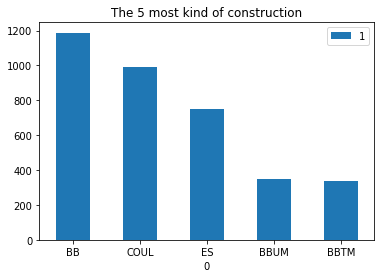

In [22]:
df['naturedernierstravaux'] = df['naturedernierstravaux'].astype(str)
construction_kind_list = df['naturedernierstravaux']
most_kinds_construction = pd.DataFrame(Counter(construction_kind_list).most_common(5))
# Now let's plot
most_kinds_construction.plot.bar(x=0,rot=0,title='The 5 most kind of construction')

Here we have the 5 most kind of construction in the dataset.
For each year, what's the number of construction made and the mean thickness ? 

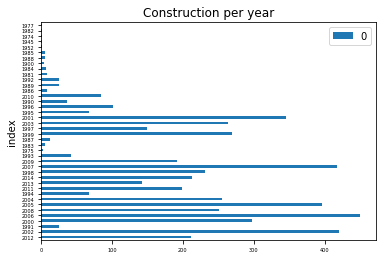

In [23]:
#Number of construction each year : 
construction_year_list = df['anneedernierstravaux']
number_construction_year = pd.DataFrame.from_dict(Counter(construction_year_list),orient='index').reset_index()
number_construction_year.plot.barh(x='index',rot=0,title='Construction per year',fontsize=5)

Now, what's the mean thickness per year ? 

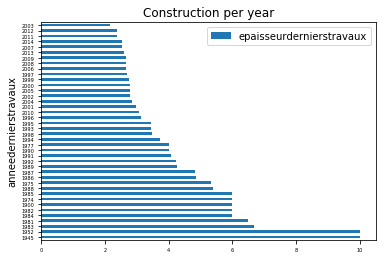

In [24]:
mean_thickness_year = df.groupby(['anneedernierstravaux'],as_index=False).mean()
mean_thickness_year = mean_thickness_year.sort_values(by='epaisseurdernierstravaux',ascending=False)
mean_thickness_year = mean_thickness_year[['anneedernierstravaux','epaisseurdernierstravaux']]
mean_thickness_year.plot.barh(x='anneedernierstravaux',rot=0,title='Construction per year',fontsize=5)

It seems that thickness diminished through time. Maybe quality of the product has increased, that is curious.